In [ ]:
# load library
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load db and check tables
conn = sql.connect('tennish.db')
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,categories,categories,2,CREATE TABLE categories (\n category_id...
1,table,competitions,competitions,4,CREATE TABLE competitions (\n id INTEGE...
2,table,complexes,complexes,160,CREATE TABLE complexes (\n complex_id T...
3,table,venues,venues,176,CREATE TABLE venues (\n complex_id TEXT...
4,table,competitors,competitors,307,CREATE TABLE competitors (\n competitor...
5,table,competitor_rankings,competitor_rankings,331,CREATE TABLE competitor_rankings (\n ra...


In [ ]:
query = "PRAGMA table_info(competitions)"
competitions_schema = pd.read_sql(query, conn)
competitions_schema

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0
2,2,type,TEXT,0,None,0
3,3,gender,TEXT,0,None,0
4,4,category_id,TEXT,0,None,0
5,5,level,TEXT,0,None,0
6,6,parent_id,TEXT,0,None,0


In [ ]:
# view compition table
query = """SELECT * FROM competitions;"""
competitions = pd.read_sql(query, conn)
competitions

,id,name,type,gender,category_id,level,parent_id
0,620,Hopman Cup,mixed,mixed,sr:category:181,Unknown,None
1,660,World Team Cup,mixed,men,sr:category:3,atp_250,None
2,990,ATP Challenger Tour Finals,singles,men,sr:category:72,Unknown,sr:competition:6239
3,1207,Championship International Series,singles,women,sr:category:6,wta_championships,None
4,2100,Davis Cup,mixed,men,sr:category:76,Unknown,None
...,...,...,...,...,...,...,...
6423,50070,UTR PTT Boca Raton Women 11,singles,women,sr:category:2517,Unknown,None
6424,50074,UTR PTT Arnhem Women 01,singles,women,sr:category:2517,Unknown,None
6425,50076,UTR PTT Waco Women 04,singles,women,sr:category:2517,Unknown,None
6426,50114,"WTA 125K Manila, Philippines Women Singles",singles,women,sr:category:871,wta_125,sr:competition:50112


In [ ]:
# view categrie table
query = """SELECT * FROM categories;"""
categories = pd.read_sql(query, conn)
categories

,category_id,category_name
0,sr:category:181,Hopman Cup
1,sr:category:3,ATP
2,sr:category:72,Challenger
3,sr:category:6,WTA
4,sr:category:76,Davis Cup
5,sr:category:74,Billie Jean King Cup
6,sr:category:785,ITF Men
7,sr:category:213,ITF Women
8,sr:category:871,WTA 125K
9,sr:category:1012,IPTL


In [ ]:
#1) List all competitions along with their category name
query = """
SELECT c.name AS competition_name, cat.category_name
FROM competitions c
JOIN categories cat ON c.category_id = cat.category_id;
"""

df_competitions_with_categories = pd.read_sql_query(query, conn)
print(df_competitions_with_categories.head())

                    competition_name category_name
0                         Hopman Cup    Hopman Cup
1                     World Team Cup           ATP
2         ATP Challenger Tour Finals    Challenger
3  Championship International Series           WTA
4                          Davis Cup     Davis Cup


In [ ]:
# 2) Count the number of competitions in each category
query_count_by_category = """
SELECT cat.category_name, COUNT(c.id) AS competition_count
FROM competitions c
JOIN categories cat ON c.category_id = cat.category_id
GROUP BY cat.category_name
ORDER BY competition_count DESC;
"""

df_competitions_per_category = pd.read_sql_query(query_count_by_category, conn)
print("\nNumber of competitions in each category:")
print(df_competitions_per_category.head())


Number of competitions in each category:
  category_name  competition_count
0       ITF Men               2198
1     ITF Women               2032
2    Challenger                967
3           WTA                255
4       UTR Men                246


In [ ]:
# 3) Find all competitions of type 'doubles'
query_doubles_competitions = """
SELECT id, name, type, gender, category_id, level
FROM competitions
WHERE type = 'doubles';
"""

df_doubles_competitions = pd.read_sql_query(query_doubles_competitions, conn)
print("\nAll competitions of type 'doubles':")
print(df_doubles_competitions.head())


All competitions of type 'doubles':
     id                           name     type gender    category_id  \
0  2557          Wimbledon Men Doubles  doubles    men  sr:category:3   
1  2561        Wimbledon Women Doubles  doubles  women  sr:category:6   
2  2569    Australian Open Men Doubles  doubles    men  sr:category:3   
3  2573  Australian Open Women Doubles  doubles  women  sr:category:6   
4  2581        French Open Men Doubles  doubles    men  sr:category:3   

        level  
0  grand_slam  
1  grand_slam  
2  grand_slam  
3  grand_slam  
4  grand_slam  


In [ ]:
# 4) Get competitions that belong to a specific category (e.g., ITF Men)
query_itf_men_competitions = """
SELECT c.id, c.name, c.type, c.gender, cat.category_name, c.level
FROM competitions c
JOIN categories cat ON c.category_id = cat.category_id
WHERE cat.category_name = 'ITF Men';
"""

df_itf_men_competitions = pd.read_sql_query(query_itf_men_competitions, conn)
print("\nCompetitions in 'ITF Men' category:")
print(df_itf_men_competitions.head())



Competitions in 'ITF Men' category:
     id                                              name     type gender  \
0  4143                 Dominican Republic F2 Men Singles  singles    men   
1  4145                 Dominican Republic F2 Men Doubles  doubles    men   
2  4393  ITF Men Stuttgart-Stammheim, Germany Men Singles  singles    men   
3  4395  ITF Men Stuttgart-Stammheim, Germany Men Doubles  doubles    men   
4  4577            ITF Men Cherkassy, Ukraine Men Singles  singles    men   

  category_name    level  
0       ITF Men  Unknown  
1       ITF Men  Unknown  
2       ITF Men  Unknown  
3       ITF Men  Unknown  
4       ITF Men  Unknown  


In [ ]:
# find prent id not null value then join based on categorical id
# 5) Identify parent competitions and their sub-competitions
query_1 = """
SELECT
    comp.name AS Sub_category,
    comp.type AS Type,
    comp.gender AS Gender,
    cat.category_name AS Category,
    comp.parent_id AS Parent_ID
FROM
    competitions comp
JOIN
    categories cat ON comp.category_id = cat.category_id
WHERE
    comp.parent_id IS NOT NULL
    AND comp.parent_id != '';"""
# read query_1
competition_category = pd.read_sql(query_1, conn)
competition_category

,Sub_category,Type,Gender,Category,Parent_ID
0,ATP Challenger Tour Finals,singles,men,Challenger,sr:competition:6239
1,Wimbledon Men Singles,singles,men,ATP,sr:competition:2553
2,Wimbledon Men Doubles,doubles,men,ATP,sr:competition:2553
3,Wimbledon Women Singles,singles,women,WTA,sr:competition:2553
4,Wimbledon Women Doubles,doubles,women,WTA,sr:competition:2553
...,...,...,...,...,...
5927,"ATP Challenger Miyazaki, Japan Men Singles",singles,men,Challenger,sr:competition:49990
5928,"ATP Challenger Metepec, Mexico Men Doubles",doubles,men,Challenger,sr:competition:50006
5929,"ATP Challenger Metepec, Mexico Men Singles",singles,men,Challenger,sr:competition:50006
5930,"WTA 125K Manila, Philippines Women Singles",singles,women,WTA 125K,sr:competition:50112


In [ ]:
# 6.Analyze the distribution of competition types by category
quer_6 = """
SELECT
    cat.category_name AS Category,
    comp.type AS Competition_Type,
    COUNT(*) AS Total_Count
FROM
    competitions comp
JOIN
    categories cat ON comp.category_id = cat.category_id
GROUP BY
    cat.category_name,
    comp.type
ORDER BY
    cat.category_name ASC,
    Total_Count DESC;"""
# read query
competition_type_by_category = pd.read_sql(quer_6, conn)
competition_type_by_category

,Category,Competition_Type,Total_Count
0,ATP,singles,109
1,ATP,doubles,108
2,ATP,mixed_doubles,6
3,ATP,mixed,2
4,Billie Jean King Cup,mixed,1
5,Challenger,singles,484
6,Challenger,doubles,483
7,Davis Cup,mixed,1
8,Exhibition,singles,28
9,Exhibition,doubles,8


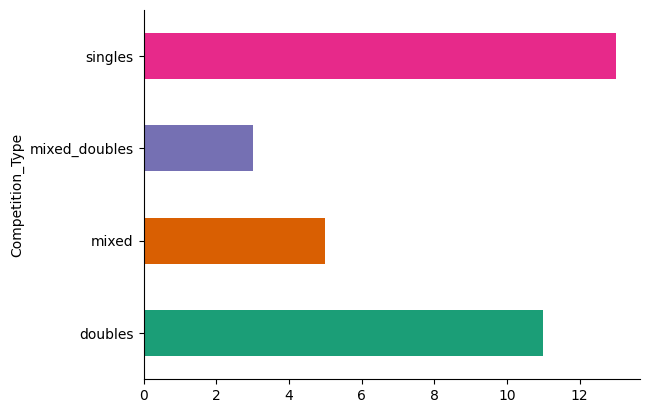

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
competition_type_by_category.groupby('Competition_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 7.List all competitions with no parent (top-level competitions)
query_7 = """
SELECT
    comp.id AS Competition_ID,
    comp.name AS Competition_Name,
    cat.category_name AS Category
FROM
    competitions comp
LEFT JOIN
    categories cat ON comp.category_id = cat.category_id
WHERE
    comp.parent_id IS NULL
    OR comp.parent_id = '';"""
# read query
competition_no_parent = pd.read_sql(query_7, conn)
competition_no_parent

,Competition_ID,Competition_Name,Category
0,620,Hopman Cup,Hopman Cup
1,660,World Team Cup,ATP
2,1207,Championship International Series,WTA
3,2100,Davis Cup,Davis Cup
4,2102,Billie Jean King Cup,Billie Jean King Cup
...,...,...,...
491,50064,UTR PTT Waco Men 06,UTR Men
492,50068,UTR PTT Newport Beach Women 19,UTR Women
493,50070,UTR PTT Boca Raton Women 11,UTR Women
494,50074,UTR PTT Arnhem Women 01,UTR Women


In [ ]:
# count null in parent_id
query_null = """
SELECT
    COUNT(*) AS Null_Count
FROM competitions
where Parent_ID is null;"""
# read query
count_null = pd.read_sql(query_null, conn)
count_null

,Null_Count
0,496


## Execute the following SQL queries:

1) List all venues along with their associated complex name
2) Count the number of venues in each complex
3) Get details of venues in a specific country (e.g., Chile)
4) Identify all venues and their timezones
5) Find complexes that have more than one venue
6) List venues grouped by country
7) Find all venues for a specific complex (e.g., Nacional)

In [ ]:
# view complexes and venue table
query = """SELECT * FROM complexes;"""
complexes = pd.read_sql(query, conn)
complexes

,complex_id,complex_name
0,sr:complex:705,Nacional
1,sr:complex:1078,Estadio la Cartuja
2,sr:complex:1495,Sibur Arena
3,sr:complex:2375,Complexo de Tenis do Jamor
4,sr:complex:4032,Shree Shiv Chhatrapati Sports Complex
...,...,...
720,sr:complex:85476,Rohan Bopanna Tennis Academy
721,sr:complex:85822,French Touch Academy
722,sr:complex:85944,Pakistan Tennis Federation
723,sr:complex:86098,Quito Tenis & Golf Club


In [ ]:
# view venuw table
query = """SELECT * FROM venues;"""
venues = pd.read_sql(query, conn)
venues

,complex_id,complex_name,venue_id,venue_name,city,country,country_code,timezone
0,sr:complex:705,Nacional,sr:venue:70045,Cancha Central,Santiago,CHILE,CHL,America/Santiago
1,sr:complex:1078,Estadio la Cartuja,sr:venue:74858,Court One,Seville,SPAIN,ESP,Europe/Madrid
2,sr:complex:1078,Estadio la Cartuja,sr:venue:74856,Centre Court,Seville,SPAIN,ESP,Europe/Madrid
3,sr:complex:1495,Sibur Arena,sr:venue:62153,TC Dynamo,Saint Petersburg,RUSSIAN FEDERATION,RUS,Europe/Moscow
4,sr:complex:1495,Sibur Arena,sr:venue:1500,CENTER COURT,Saint Petersburg,RUSSIAN FEDERATION,RUS,Europe/Moscow
...,...,...,...,...,...,...,...,...
3798,sr:complex:86098,Quito Tenis & Golf Club,sr:venue:86166,Cancha 1,Quito,ECUADOR,ECU,America/Guayaquil
3799,sr:complex:86098,Quito Tenis & Golf Club,sr:venue:86164,Cancha Central,Quito,ECUADOR,ECU,America/Guayaquil
3800,sr:complex:86252,K-Town Resort,sr:venue:86258,K-Town Resort - Court 13,Phan Thiet,VIETNAM,VNM,Asia/Ho_Chi_Minh
3801,sr:complex:86252,K-Town Resort,sr:venue:86256,K-Town Resort - Court 11,Phan Thiet,VIETNAM,VNM,Asia/Ho_Chi_Minh


In [ ]:
# Query_List all venues along with their associated complex name
query_8 = """
SELECT
    v.venue_name,
    c.complex_name
FROM
    venues v
JOIN
    complexes c ON v.complex_id = c.complex_id;"""
# read query
venues_complex = pd.read_sql(query_8, conn)
venues_complex

,venue_name,complex_name
0,Cancha Central,Nacional
1,Court One,Estadio la Cartuja
2,Centre Court,Estadio la Cartuja
3,TC Dynamo,Sibur Arena
4,CENTER COURT,Sibur Arena
...,...,...
3798,Cancha 1,Quito Tenis & Golf Club
3799,Cancha Central,Quito Tenis & Golf Club
3800,K-Town Resort - Court 13,K-Town Resort
3801,K-Town Resort - Court 11,K-Town Resort


In [ ]:
# 9 Count the number of venues in each complex
query_9 = """
SELECT
    c.complex_name,
    COUNT(v.venue_id) AS Venue_Count
FROM
    complexes c
LEFT JOIN
    venues v ON c.complex_id = v.complex_id
GROUP BY
    c.complex_id;"""
# read query
venue_count_by_complex = pd.read_sql(query_9, conn)
venue_count_by_complex

,complex_name,Venue_Count
0,Kindarena,4
1,Estadio la Cartuja,2
2,Estadio German Becker,4
3,Palais des sports de Gerland,7
4,Sibur Arena,4
...,...,...
720,French Touch Academy,6
721,Pakistan Tennis Federation,4
722,Quito Tenis & Golf Club,3
723,K-Town Resort,3


In [ ]:
# 9 Count the number of venues in each complex (descending order)
query_9_desc = """
SELECT
    c.complex_name,
    COUNT(v.venue_id) AS Venue_Count
FROM
    complexes c
LEFT JOIN
    venues v ON c.complex_id = v.complex_id
GROUP BY
    c.complex_id
ORDER BY
    Venue_Count DESC;"""
# read query
venue_count_by_complex_desc = pd.read_sql(query_9_desc, conn)
venue_count_by_complex_desc

,complex_name,Venue_Count
0,Buenos Aires Lawn Tennis Club,30
1,Melbourne Park,25
2,Hurd Tennis Center,24
3,Club Tennis Las Terrazas de Miraflores,23
4,Qi Zhong Tennis Center,22
...,...,...
720,Coque Luxenbourg,0
721,Boulevard de las Naciones and Paseo de los Man...,0
722,OU Tennis Club,0
723,Chase Center,0


Top 5 Complexes by Venue Count:

Buenos Aires Lawn Tennis Club: 30 venues
Melbourne Park: 25 venues
Hurd Tennis Center: 24 venues
Club Tennis Las Terrazas de Miraflores: 23 venues
Qi Zhong Tennis Center: 22 venues
As you can see, the 'Buenos Aires Lawn Tennis Club' has the most venues with 30, while many complexes at the bottom of the list have 0 venues, meaning there are no venue entries associated with them in the venues table

In [ ]:
# 10 Get details of venues in a specific country (e.g., Chile)
query_10 = """
select venue_name, country, city, timezone from venues where country = 'CHILE';"""
# read query
venues_chile = pd.read_sql(query_10, conn)
venues_chile

,venue_name,country,city,timezone
0,Cancha Central,CHILE,Santiago,America/Santiago
1,Cancha 2,CHILE,Temuco,America/Santiago
2,Cancha 3,CHILE,Temuco,America/Santiago
3,Cancha Central,CHILE,Temuco,America/Santiago
4,Cancha 1,CHILE,Temuco,America/Santiago
...,...,...,...,...
60,Court 1,CHILE,Colina,America/Santiago
61,C2 Shell,CHILE,Santiago,America/Santiago
62,Cc. Banco De Chile,CHILE,Santiago,America/Santiago
63,C4 Skechers,CHILE,Santiago,America/Santiago


In [ ]:
# 11. Identify all venues and their timezones
query_11 = """
SELECT distinct
    venue_name,
    timezone
FROM
    venues;"""
# read query
venues_timezone = pd.read_sql(query_11, conn)
venues_timezone

,venue_name,timezone
0,Cancha Central,America/Santiago
1,Court One,Europe/Madrid
2,Centre Court,Europe/Madrid
3,TC Dynamo,Europe/Moscow
4,CENTER COURT,Europe/Moscow
...,...,...
2150,Court 1,Asia/Karachi
2151,Centre Court,Asia/Karachi
2152,K-Town Resort - Court 13,Asia/Ho_Chi_Minh
2153,K-Town Resort - Court 11,Asia/Ho_Chi_Minh


In [ ]:
# 12.Find complexes that have more than one venue
query_12 = """
SELECT
complex_name,
    COUNT(venue_id) AS venue_count
FROM
    venues
GROUP BY
    complex_name
HAVING
    COUNT(venue_id) > 1
ORDER BY
    venue_count DESC;"""
# read query
complex_more_than_one_venue = pd.read_sql(query_12, conn)
complex_more_than_one_venue

,complex_name,venue_count
0,National Tennis Center,54
1,Buenos Aires Lawn Tennis Club,30
2,Melbourne Park,25
3,Hurd Tennis Center,24
4,Club Tennis Las Terrazas de Miraflores,23
...,...,...
539,Brussels Expo – Palais 12,2
540,Beograndska Arena,2
541,BT Arena,2
542,Almaty Arena,2


In [ ]:
# 13 List venues grouped by country
query_13 = """
SELECT
    country,
    COUNT(venue_name) AS venue_count
FROM
    venues
GROUP BY
    country
ORDER BY
    venue_count DESC;"""
# read query
venues_grouped_by_country = pd.read_sql(query_13, conn)
venues_grouped_by_country

,country,venue_count
0,UNITED STATES,600
1,ITALY,279
2,FRANCE,268
3,CHINA,235
4,SPAIN,209
...,...,...
69,SAUDI ARABIA,3
70,PARAGUAY,3
71,COTE D IVOIRE,3
72,ISRAEL,2


In [ ]:
# 14 Find all venues for a specific complex (e.g., Nacional)
query_14 = """
SELECT
    v.venue_name,
    v.city,
    v.timezone
FROM
    venues v
JOIN
    complexes c ON v.complex_id = c.complex_id
WHERE
    c.complex_name = 'Nacional';"""
# read query
venues_complex_nacional = pd.read_sql(query_14, conn)
venues_complex_nacional

,venue_name,city,timezone
0,Cancha Central,Santiago,America/Santiago


## Execute the following SQL queries:
1) Get all competitors with their rank and points.
2) Find competitors ranked in the top 5

3) List competitors with no rank movement (stable rank)
4) Get the total points of competitors from a specific country (e.g., Croatia)
5) Count the number of competitors per country
6) Find competitors with the highest points in the current week

In [ ]:
# view compititor
query = """SELECT * FROM competitors;"""
competitors = pd.read_sql(query, conn)
competitors

,competitor_id,competitor_name,country,country_code,abbreviation
0,sr:competitor:59131,"Glasspool, Lloyd",Great Britain,GBR,GLA
1,sr:competitor:108099,"Cash, Julian",Great Britain,GBR,CAS
2,sr:competitor:14898,"Heliovaara, Harri",Finland,FIN,HEL
3,sr:competitor:637970,"Patten, Henry",Great Britain,GBR,PAT
4,sr:competitor:16160,"Zeballos, Horacio",Argentina,ARG,ZEB
...,...,...,...,...,...
995,sr:competitor:194572,"Dartron, Emeline",France,FRA,DAR
996,sr:competitor:790640,"Marcinko, Petra",Croatia,HRV,MAR
997,sr:competitor:768470,"Turini, Viola",Italy,ITA,TUR
998,sr:competitor:504238,"Sierra, Solana",Argentina,ARG,SIE


In [ ]:
# compititor ranking view
query = """SELECT * FROM competitor_rankings;"""
ranking = pd.read_sql(query, conn)
ranking

,rank_id,competitor_id,year,week,rank,points,movement,competitions_played
0,1,sr:competitor:59131,2025,52,1,8610,0,23
1,2,sr:competitor:108099,2025,52,2,8520,0,24
2,3,sr:competitor:14898,2025,52,3,7980,0,23
3,4,sr:competitor:637970,2025,52,3,7980,0,23
4,5,sr:competitor:16160,2025,52,5,7115,0,18
...,...,...,...,...,...,...,...,...
995,996,sr:competitor:194572,2025,52,496,143,0,8
996,997,sr:competitor:790640,2025,52,497,143,0,5
997,998,sr:competitor:768470,2025,52,498,143,0,16
998,999,sr:competitor:504238,2025,52,499,142,1,6


In [ ]:
# 15 Get all competitors with their rank and points.
query_15 = """
SELECT
    c.competitor_name,
    r.rank,
    r.points
FROM
    competitors c
JOIN
    competitor_rankings r ON c.competitor_id = r.competitor_id;"""
#read query
competitor_rank_points = pd.read_sql(query_15, conn)
competitor_rank_points

,competitor_name,rank,points
0,"Glasspool, Lloyd",1,8610
1,"Cash, Julian",2,8520
2,"Heliovaara, Harri",3,7980
3,"Patten, Henry",3,7980
4,"Zeballos, Horacio",5,7115
...,...,...,...
995,"Dartron, Emeline",496,143
996,"Marcinko, Petra",497,143
997,"Turini, Viola",498,143
998,"Sierra, Solana",499,142


In [ ]:
# 16 Find competitors ranked in the top 5
query_16 = """
SELECT
    c.competitor_name,
    r.rank,
    r.points
FROM
    competitors c
JOIN
    competitor_rankings r ON c.competitor_id = r.competitor_id
    AND r.rank <= 5;"""
# read query
competitor_rank_points_top5 = pd.read_sql(query_16, conn)
competitor_rank_points_top5

,competitor_name,rank,points
0,"Glasspool, Lloyd",1,8610
1,"Cash, Julian",2,8520
2,"Heliovaara, Harri",3,7980
3,"Patten, Henry",3,7980
4,"Zeballos, Horacio",5,7115
5,"Siniakova, Katerina",1,8780
6,"Townsend, Taylor",2,8485
7,"Errani, Sara",3,7195
8,"Paolini, Jasmine",3,7195
9,"Mertens, Elise",5,6730


In [ ]:
# 17 List competitors with no rank movement (stable rank)
query_17 = """
select
    c.competitor_name,
    r.rank,
    r.points,
    r.movement
FROM
    competitors c
JOIN
    competitor_rankings r ON c.competitor_id = r.competitor_id
WHERE
    r.movement = 0;"""
# read query
competitor_rank_points = pd.read_sql(query_17, conn)
competitor_rank_points

,competitor_name,rank,points,movement
0,"Glasspool, Lloyd",1,8610,0
1,"Cash, Julian",2,8520,0
2,"Heliovaara, Harri",3,7980,0
3,"Patten, Henry",3,7980,0
4,"Zeballos, Horacio",5,7115,0
...,...,...,...,...
645,"Maristany Zuleta de Reales, Guiomar",494,144,0
646,"Allen, Kolie",495,144,0
647,"Dartron, Emeline",496,143,0
648,"Marcinko, Petra",497,143,0


In [ ]:
# 18 Get the total points of competitors from a specific country (e.g., Croatia)
query_18 = """
SELECT
     SUM(r.points) AS total_points
FROM
    competitors c
JOIN
    competitor_rankings r ON c.competitor_id = r.competitor_id
WHERE
    c.country = 'Croatia'; -- Replace with desired country"""

# read query
total_points_croatia = pd.read_sql(query_18, conn)
total_points_croatia

,total_points
0,13534


In [ ]:
# 19 Count the number of competitors per country
query_19 = """
SELECT
    country,
    COUNT(competitor_id) AS competitor_count
FROM
    competitors
GROUP BY
    country
ORDER BY
    competitor_count DESC;"""
# read query
competitor_count_by_country = pd.read_sql(query_19, conn)
competitor_count_by_country

,country,competitor_count
0,USA,113
1,Great Britain,55
2,Neutral,53
3,France,49
4,Japan,47
...,...,...
71,Egypt,1
72,Burundi,1
73,Belarus,1
74,Antigua and Barbuda,1


In [ ]:
# 20 Find competitors with the highest points in the current week.
query_20 = """
SELECT
    c.competitor_name,
    r.points
FROM
    competitors c
JOIN
    competitor_rankings r ON c.competitor_id = r.competitor_id
    AND r.week = (SELECT MAX(week) FROM competitor_rankings)
ORDER BY
    r.points DESC;"""
# read query
competitor_highest_points = pd.read_sql(query_20, conn)
competitor_highest_points

,competitor_name,points
0,"Siniakova, Katerina",8780
1,"Glasspool, Lloyd",8610
2,"Cash, Julian",8520
3,"Townsend, Taylor",8485
4,"Heliovaara, Harri",7980
...,...,...
995,"Duhan, Chirag",112
996,"Remondy Pagotto, Victor Hugo",112
997,"Nagel, Arthur",112
998,"Guillen Meza, Alvaro",111
